In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import time
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('https://www.kaggle.com/datasets/atharvasoundankar/smart-farming-sensor-data-for-yield-prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('/kaggle/input/smart-farming-sensor-data-for-yield-prediction/Smart_Farming_Crop_Yield_2024.csv')
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

thedataset has 500 rows, and 22 columns

In [4]:
#checking for null values
df.isnull().sum()

farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
NDVI_index                0
crop_disease_status     130
dtype: int64

there are null values, we have to clean  the data by filling the null values

In [5]:
df["irrigation_type"].value_counts()

irrigation_type
Sprinkler    121
Manual       118
Drip         111
Name: count, dtype: int64

In [6]:
#DATA CLEANING
df['irrigation_type'].fillna(df['irrigation_type'].mode()[0], inplace=True)

df['crop_disease_status'].fillna(df['crop_disease_status'].mode()[0], inplace=True)

/tmp/ipykernel_417/438689778.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['irrigation_type'].fillna(df['irrigation_type'].mode()[0], inplace=True)
/tmp/ipykernel_417/438689778.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       500 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [8]:
df.isnull().sum()

farm_id                 0
region                  0
crop_type               0
soil_moisture_%         0
soil_pH                 0
temperature_C           0
rainfall_mm             0
humidity_%              0
sunlight_hours          0
irrigation_type         0
fertilizer_type         0
pesticide_usage_ml      0
sowing_date             0
harvest_date            0
total_days              0
yield_kg_per_hectare    0
sensor_id               0
timestamp               0
latitude                0
longitude               0
NDVI_index              0
crop_disease_status     0
dtype: int64

there are no null values now 


## EDA and Visualization

In [9]:
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,Sprinkler,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,Severe
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,Severe
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,Sprinkler,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe


Text(0.5, 1.0, 'crop_disease_status distribution')

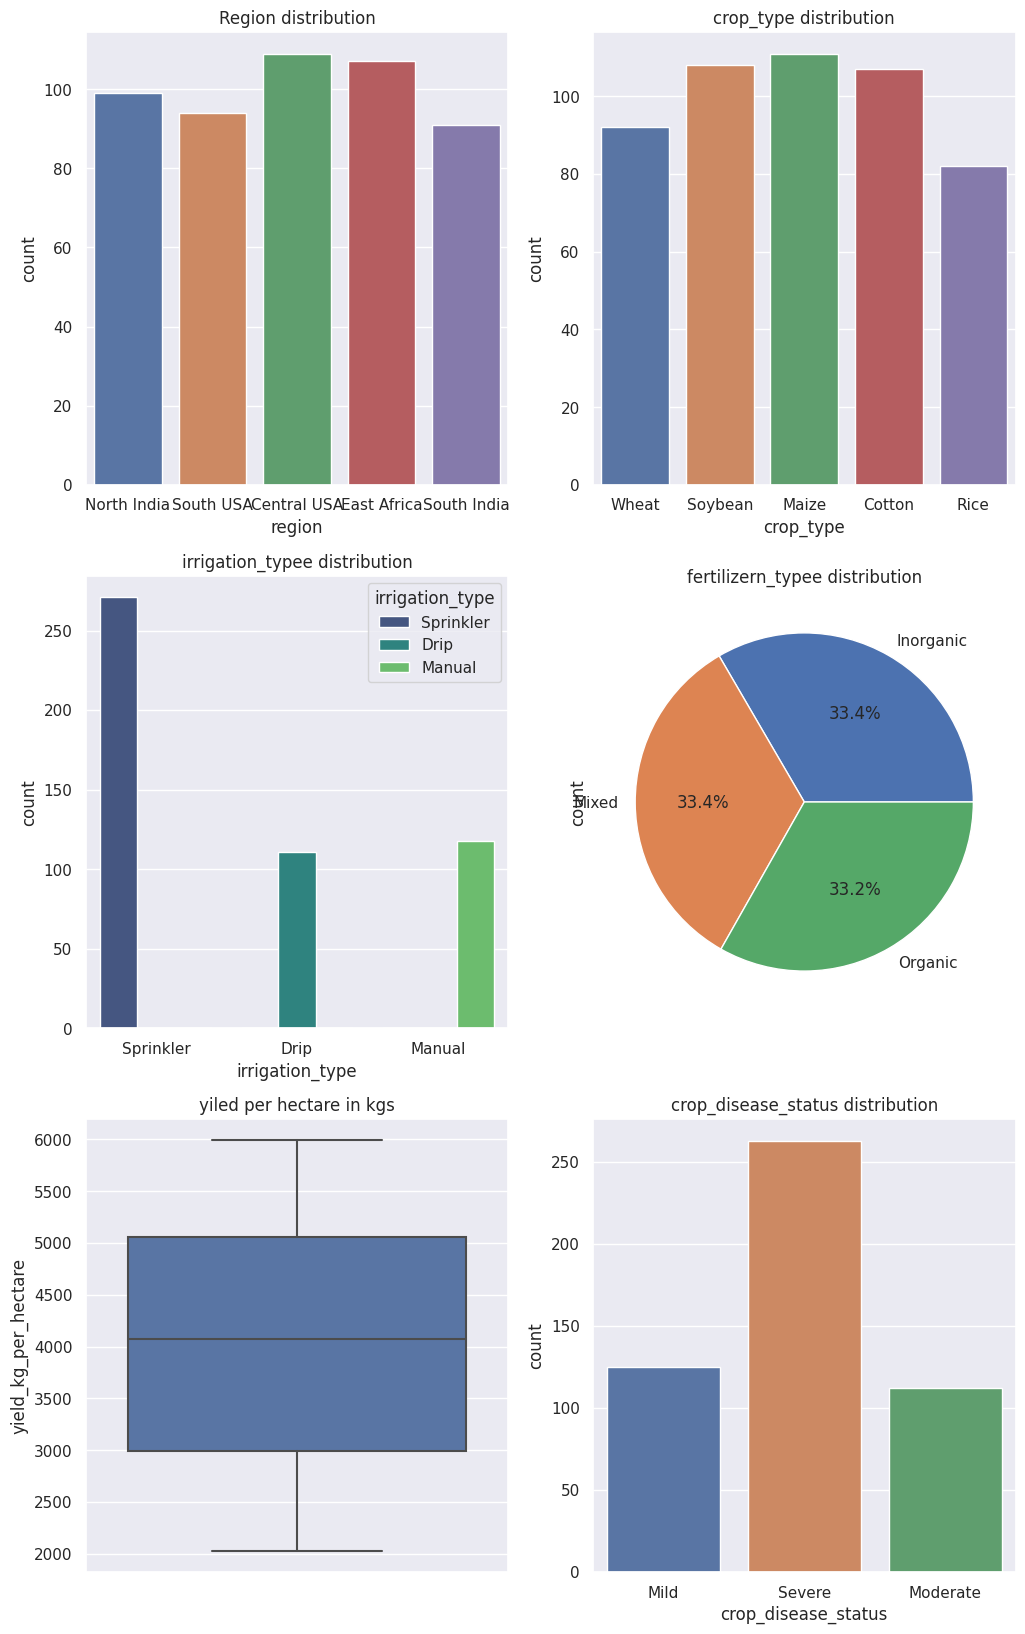

In [10]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 20))
sns.countplot(data=df, x="region", ax = axes[0,0])
axes[0, 0].set_title('Region distribution')

sns.countplot(data=df, x="crop_type", ax = axes[0,1])
axes[0, 1].set_title('crop_type distribution')

sns.countplot(data=df, x="irrigation_type", ax = axes[1,0], palette="viridis", hue=df["irrigation_type"])
axes[1, 0].set_title('irrigation_typee distribution')

df['fertilizer_type'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1,1])
axes[1, 1].set_title('fertilizern_typee distribution')

sns.boxplot(y=df['yield_kg_per_hectare'],ax=axes[2, 0])
axes[2, 0].set_title("yiled per hectare in kgs")


sns.countplot(data=df, x="crop_disease_status", ax = axes[2,1])
axes[2, 1].set_title('crop_disease_status distribution')

Insight:
* Central USA recorded the highest number of plantations
* Maize was the most planted plant,followed by Soybean
* Sprinkler as the mostly used irrigation method
* Fertilzier types had an almost equal distribution in usage, with inorganic and mixed type, recording 33.4% each.
* Most of the plants had severe crop diseases status,


#### Bivariate Visualization

In [11]:
df.head(2)

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,Sprinkler,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,Severe


Text(0.5, 1.0, 'Region and Type of crop')

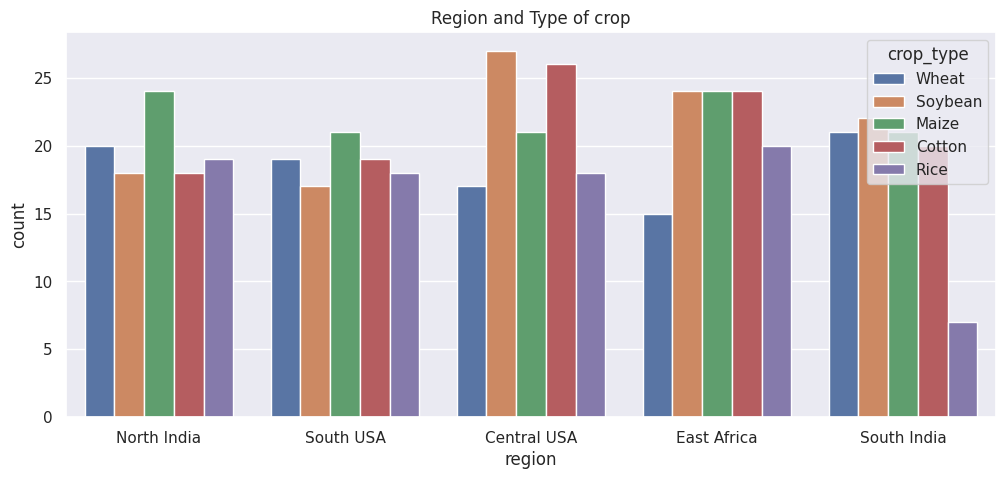

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="region", hue="crop_type")
plt.title("Region and Type of crop")

Insight:
* In North India, the most planted crop was Maize, while the least was cotton and soybean
* In South USA, the most common planted crop was Maize, followed by wheat and cotton
* In central USA, Soybean was the most common plantedc crop, followed by cotton
* IN EAST Africa, both Maize, Soybean and Cotton had an eauql distribution in plantation
* In south India, Soybean wa sthe most common planted crop, followed  by wheat


Text(0.5, 1.0, ' yield in each Region based on crop type')

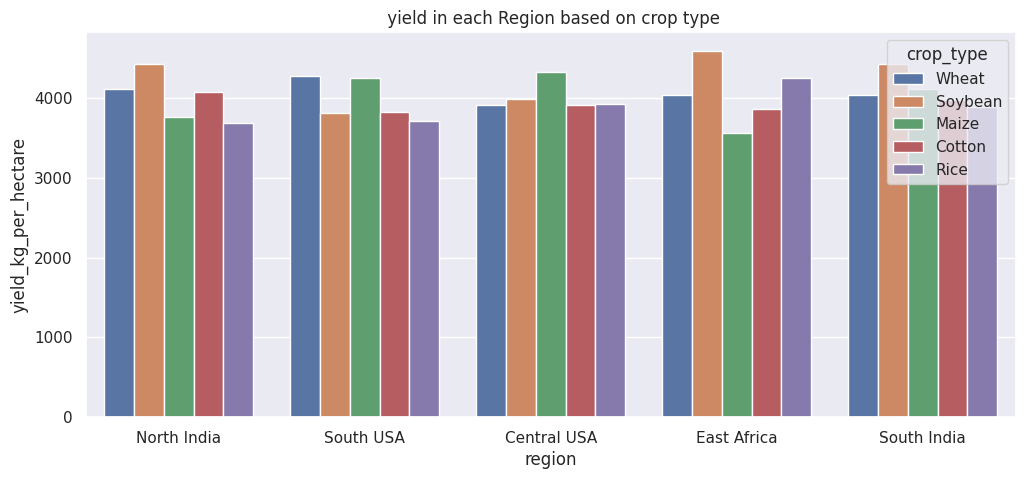

In [13]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x="region", y="yield_kg_per_hectare", hue="crop_type",errorbar=None)
plt.title(" yield in each Region based on crop type")

Insight:
* In North India, Soybean had the hight yield kg per hectare, cwhie Rice had the least, here we can check on the soil and rainfall properties
* In South USA, Wheat had the highest yield kgs per hectare, followed by Maize
* In Cental USA, Maize had the highest yield kgs per hectare,while wheat had the least,
* in East Africa, Soybean had  the highest yield kgs per hectare, followed by Rice,
* In South Africa, Soybean also had the highest yield in kgs per hectare


In [14]:
df.head(2)

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,Sprinkler,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,Severe


In [15]:
import plotly.express as px
fig = px.scatter(df, x='soil_moisture_%', y='yield_kg_per_hectare')
fig.update_layout(title='Soil Moisture vs Yield',
                  xaxis_title='Soil Moisture (%)',
                  yaxis_title='Yield (kg/hectare)')
fig.show()

In [16]:
fertilizer_yield = df.groupby("fertilizer_type")["yield_kg_per_hectare"].sum()
fig=px.bar(x=fertilizer_yield.index, y=fertilizer_yield.values, color=fertilizer_yield.index)
fig.show()

Insight:
* Inorganic  type of fertilizer recorded the highest number of yield kg per hectare, followed by Mixed and Organix respectifully


In [17]:
fert_crop_yield = df.groupby(["fertilizer_type", "crop_type"])["yield_kg_per_hectare"].sum().reset_index()


In [18]:
fig = px.bar(fert_crop_yield, x="crop_type", y="yield_kg_per_hectare", color="fertilizer_type", barmode="group")
fig.update_layout(title="Yield by Crop and Fertilizer Type")
fig.show()


Insight:
* Cotton has a high yield kg per hectare when Mixed fertilizer type is used on it , and it has the loest yield when Organic fertilizer is used
* Maize has a high yield per hectare when Mixed fertilizer is used, and lowest when Inorganic fertilizer is used
* Rice has a high yield when Organic fertilizer type is used on it  and very low when Mixed fertilizer type is used on it
* Soybean has the highest yield kg per hectare when Inorganix fertilizer is applied on it
* For wheat, is had  the highest yield when  Organic fertilizer has been applied

###### Environmental features

In [19]:
fig = px.scatter_geo(df, lat='latitude', lon='longitude', color='crop_type',
                     hover_name='region', size='yield_kg_per_hectare',
                     title='Geographic Distribution of Crop Yields')
fig.show()


In [20]:
fig = px.scatter(
    df,
    x='soil_moisture_%',
    y='yield_kg_per_hectare',
    color='crop_type',          # Color by crop type
    title='Soil Moisture vs Yield (colored by Crop Type)'
)
fig.show()

Inisght:
* Cotton has the highest yiled per hectare when the soil moisture is around 14-15.
* Soybean has the hoghest yiled when the soil moisture is around 20-35
* Maiz does worst in yields with soil moisture of 45
* Whaeat also does good under 30-35 , almost the same soil conditions for Soybean


In [21]:
fig = px.scatter(
    df,
    x='rainfall_mm',
    y='yield_kg_per_hectare',
    color='crop_type',          # Color by crop type
    size='sunlight_hours',      # Size by sunlight
    hover_data=['region'],      # Extra info on hover
    title='rainfall vs Yield (colored by Crop Type)'
)
fig.show()

#### Time series analysis

In [22]:
df.head(2)

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,Sprinkler,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,Severe


In [23]:
df["harvest_date"] = pd.to_datetime(df["harvest_date"])

In [24]:
import datetime as dt
df["harvest_year"]  = df["harvest_date"].dt.year
df["harvest_month"]   = df["harvest_date"].dt.month_name()
df["harvest_day"] = df["harvest_date"].dt.day_name()

In [25]:
time = df.groupby(["harvest_month","crop_type"])["yield_kg_per_hectare"].sum().reset_index()
fig = px.bar(time, x="crop_type", y="yield_kg_per_hectare", color="harvest_month", barmode="group")
fig.show()

# Predictive Analysis

##### Predicting yield_per kg_hectaee based on necessary features

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score,  classification_report
# ML Models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier,  KNeighborsRegressor

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   farm_id               500 non-null    object        
 1   region                500 non-null    object        
 2   crop_type             500 non-null    object        
 3   soil_moisture_%       500 non-null    float64       
 4   soil_pH               500 non-null    float64       
 5   temperature_C         500 non-null    float64       
 6   rainfall_mm           500 non-null    float64       
 7   humidity_%            500 non-null    float64       
 8   sunlight_hours        500 non-null    float64       
 9   irrigation_type       500 non-null    object        
 10  fertilizer_type       500 non-null    object        
 11  pesticide_usage_ml    500 non-null    float64       
 12  sowing_date           500 non-null    object        
 13  harvest_date        

we can drop columns that we will not use henceforth

In [28]:
data = df.drop(columns=["farm_id", "sowing_date", "harvest_date","sensor_id", "timestamp","harvest_year","harvest_month","harvest_day"])

#### Data preprocessing 

In [29]:
le = LabelEncoder()

In [30]:
#encoding categorical columns
for columns in data.select_dtypes("object").columns:
    le=LabelEncoder()
    data[columns] = le.fit_transform(data[columns])

In [31]:
data.head()

,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,fertilizer_type,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index,crop_disease_status
0,2,4,35.95,5.99,17.79,75.62,77.03,7.27,2,2,6.34,122,4408.07,14.970941,82.997689,0.63,0
1,4,3,19.74,7.24,30.18,89.91,61.13,5.67,2,0,9.60,112,5389.98,16.613022,70.869009,0.58,2
2,4,4,29.32,7.16,27.37,265.43,68.87,8.23,0,1,15.26,144,2931.16,19.503156,79.068206,0.80,0
3,0,1,17.33,6.03,33.73,212.01,70.46,5.03,2,2,25.80,134,4227.80,31.071298,85.519998,0.44,2
4,0,0,19.37,5.92,33.86,269.09,55.73,7.93,2,1,25.65,105,4979.96,16.568540,81.691720,0.84,2


<Axes: >

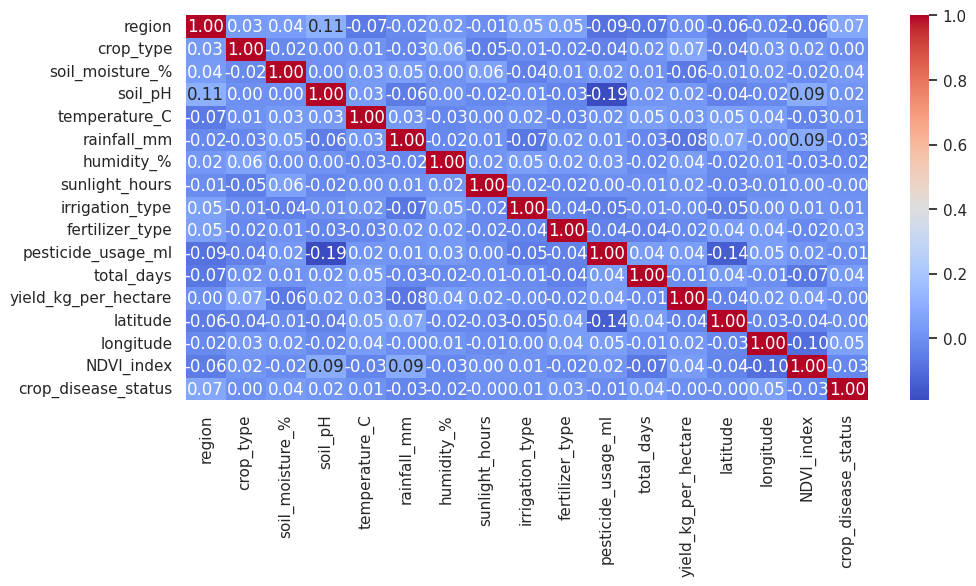

In [32]:
plt.figure(figsize=(11,5))
sns.heatmap(data.corr(),annot=True, cmap="coolwarm", fmt=".2f")


In [33]:
data.corr()

,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,fertilizer_type,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index,crop_disease_status
region,1.000000,0.033651,0.035763,0.108100,-0.065396,-0.018229,0.021683,-0.009549,0.054992,0.049951,-0.089849,-0.067157,0.001479,-0.061726,-0.019428,-0.058548,0.073657
crop_type,0.033651,1.000000,-0.018728,0.001324,0.011116,-0.025956,0.062661,-0.049404,-0.014581,-0.024221,-0.043506,0.015522,0.073008,-0.043201,0.026770,0.017547,0.000181
soil_moisture_%,0.035763,-0.018728,1.000000,0.001696,0.032365,0.048468,0.003722,0.058180,-0.044520,0.006535,0.022374,0.006927,-0.063038,-0.013356,0.018570,-0.015675,0.035020
soil_pH,0.108100,0.001324,0.001696,1.000000,0.031248,-0.059785,0.003853,-0.022967,-0.005913,-0.033206,-0.192798,0.018942,0.024274,-0.043649,-0.016157,0.092729,0.019294
temperature_C,-0.065396,0.011116,0.032365,0.031248,1.000000,0.026232,-0.028917,0.001237,0.020777,-0.027589,0.019528,0.045627,0.027875,0.050449,0.039741,-0.032986,0.010106
rainfall_mm,-0.018229,-0.025956,0.048468,-0.059785,0.026232,1.000000,-0.023946,0.005975,-0.072340,0.017237,0.013479,-0.025672,-0.076802,0.068599,-0.004107,0.091088,-0.034346
humidity_%,0.021683,0.062661,0.003722,0.003853,-0.028917,-0.023946,1.000000,0.015724,0.047333,0.021835,0.029472,-0.017590,0.039021,-0.021625,0.013954,-0.027281,-0.022550
sunlight_hours,-0.009549,-0.049404,0.058180,-0.022967,0.001237,0.005975,0.015724,1.000000,-0.020329,-0.016357,0.002825,-0.006084,0.020284,-0.026100,-0.010468,0.004330,-0.001258
irrigation_type,0.054992,-0.014581,-0.044520,-0.005913,0.020777,-0.072340,0.047333,-0.020329,1.000000,-0.038205,-0.054325,-0.012947,-0.002923,-0.053389,0.003624,0.009407,0.005408
fertilizer_type,0.049951,-0.024221,0.006535,-0.033206,-0.027589,0.017237,0.021835,-0.016357,-0.038205,1.000000,-0.043360,-0.043739,-0.016702,0.038764,0.041547,-0.023188,0.030104


the categoricl columns have been encoded

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region                500 non-null    int64  
 1   crop_type             500 non-null    int64  
 2   soil_moisture_%       500 non-null    float64
 3   soil_pH               500 non-null    float64
 4   temperature_C         500 non-null    float64
 5   rainfall_mm           500 non-null    float64
 6   humidity_%            500 non-null    float64
 7   sunlight_hours        500 non-null    float64
 8   irrigation_type       500 non-null    int64  
 9   fertilizer_type       500 non-null    int64  
 10  pesticide_usage_ml    500 non-null    float64
 11  total_days            500 non-null    int64  
 12  yield_kg_per_hectare  500 non-null    float64
 13  latitude              500 non-null    float64
 14  longitude             500 non-null    float64
 15  NDVI_index            5

In [35]:
X = data.drop(columns="yield_kg_per_hectare")
y=data["yield_kg_per_hectare"]

In [36]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8)

In [38]:
import time
models={
    "Linear Regression":LinearRegression(),
    "Random Forest Regression":RandomForestRegressor(),
    "Decision Tree Regression":DecisionTreeRegressor(),
    "Support Vectpor Machine":SVR(),
    "KNeighborsRegressor":KNeighborsRegressor()
    
}
results_regression=[]
for name, model in models.items():
    start_time=time.time()
    #training model
    model.fit(X_train,y_train)
    #prediction
    pred  = model.predict(X_test)
    end_time=time.time()
    #metrics
       
    r2 = r2_score(y_test,pred)*100
    elapsed_time=end_time-start_time
    results_regression.append({"model":name, "r2_score":r2, "time":elapsed_time})
    data_results_regression = pd.DataFrame(results_regression)
    print(data_results_regression)

    

               model  r2_score      time
0  Linear Regression -0.038587  0.003194
                      model  r2_score      time
0         Linear Regression -0.038587  0.003194
1  Random Forest Regression  0.567559  0.418417
                      model   r2_score      time
0         Linear Regression  -0.038587  0.003194
1  Random Forest Regression   0.567559  0.418417
2  Decision Tree Regression -93.225495  0.005494
                      model   r2_score      time
0         Linear Regression  -0.038587  0.003194
1  Random Forest Regression   0.567559  0.418417
2  Decision Tree Regression -93.225495  0.005494
3   Support Vectpor Machine  -0.049886  0.010073
                      model   r2_score      time
0         Linear Regression  -0.038587  0.003194
1  Random Forest Regression   0.567559  0.418417
2  Decision Tree Regression -93.225495  0.005494
3   Support Vectpor Machine  -0.049886  0.010073
4       KNeighborsRegressor -16.583214  0.025820


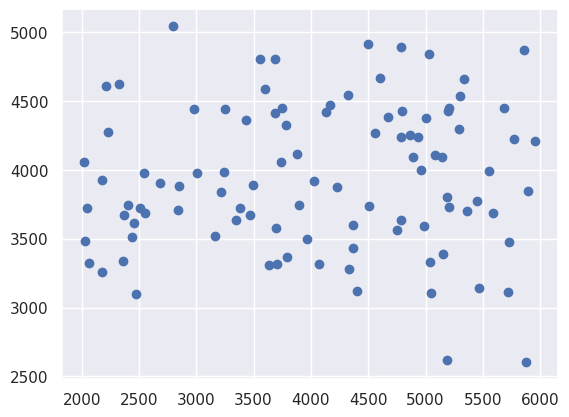

In [39]:
plt.scatter(y_test, pred)